In [1]:
import pretrainedmodels
print(pretrainedmodels.model_names)

['fbresnet152', 'bninception', 'resnext101_32x4d', 'resnext101_64x4d', 'inceptionv4', 'inceptionresnetv2', 'alexnet', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'inceptionv3', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19_bn', 'vgg19', 'nasnetamobile', 'nasnetalarge', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn131', 'dpn107', 'xception', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'cafferesnet101', 'pnasnet5large', 'polynet']


In [2]:
import requests
import json

labels = {}
with open('docker/local_test/test_dir/model/imagenet-simple-labels.json') as f:
    data = json.load(f)
    labels = {int(key): value for key, value in enumerate(data)}


import time

t0 = time.time()

model_name = 'inceptionv4' # could be fbresnet152 or inceptionresnetv2
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model.eval()

t1 = time.time()

print('loading time {:.2f}'.format(t1 - t0))

loading time 1.04


In [3]:
import urllib
from io import BytesIO
from PIL import Image
def read_image(url):
    resp = urllib.request.urlopen(url).read()
    img = Image.open(BytesIO(resp))
    return img.convert('RGB')


import torch
import pretrainedmodels.utils as utils
from torch.nn import functional as F


# transformations depending on the model
# rescale, center crop, normalize, and others (ex: ToBGR, ToRange255)
tf_img = utils.TransformImage(model) 




0.01 0.77 0.00
0.00 0.77 0.00
0.00 0.74 0.00
0.00 0.78 0.00
0.00 0.82 0.00
0.01 0.81 0.00
0.00 0.77 0.00
0.01 0.75 0.00
0.01 0.75 0.00
0.00 0.75 0.00
0.01 0.75 0.00
0.01 0.78 0.00
0.01 0.83 0.00
0.00 0.74 0.00
0.01 0.84 0.00
0.00 0.75 0.00
0.00 0.76 0.00
0.00 0.77 0.00
0.00 0.75 0.00
0.00 0.76 0.00
0.01 0.76 0.00
0.00 0.78 0.00
0.00 0.77 0.00
0.00 0.85 0.00
0.01 0.97 0.00
0.01 0.79 0.00


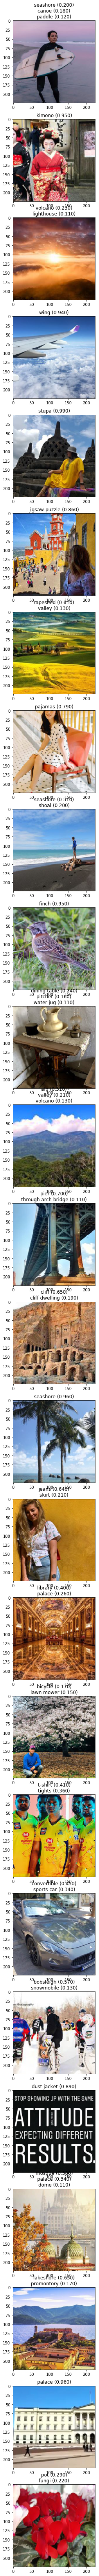

In [4]:
test_images = [
    'https://www.instagram.com/p/BvPb5OBh6XM/media?size=m',
    'https://www.instagram.com/p/Bvfh3nHlvhK/media?size=m',
    'https://www.instagram.com/p/Bvfh3udnKBg/media?size=m',
    'https://www.instagram.com/p/Bvfh3jhlvhy/media?size=m',
    'https://www.instagram.com/p/Bvfh2guhyvK/media?size=m',
    'https://www.instagram.com/p/Bvfh1yUJ1hR/media?size=m',
    'https://www.instagram.com/p/Bvfh0iyBMkD/media?size=m',
    'https://www.instagram.com/p/BvfhziAlVCB/media?size=m',
    'https://www.instagram.com/p/BvdoF1OFTMi/media?size=m',
    'https://www.instagram.com/p/BveHq7QBFmB/media?size=m',
    'https://www.instagram.com/p/BvQ8KYtFwjE/media?size=m',
    'https://www.instagram.com/p/BtyB7b0lUV_/media?size=m',
    'https://www.instagram.com/p/BvfhyEulnXP/media?size=m',
    'https://www.instagram.com/p/BvfhvODgj5z/media?size=m',
    'https://www.instagram.com/p/Bvfhms0DcxM/media?size=m',
    'https://www.instagram.com/p/BvfhsAsp1Zc/media?size=m',
    'https://www.instagram.com/p/BvfhqrYnYtf/media?size=m',
    'https://www.instagram.com/p/BvfhquIBMMt/media?size=m',
    'https://www.instagram.com/p/BvfmZtNlmZL/media?size=m',
    'https://www.instagram.com/p/BvfmWSHhBMN/media?size=m',
    'https://www.instagram.com/p/BvfmI0Ng5w4/media?size=m',
    'https://www.instagram.com/p/Bt6qNGzFkOD/media?size=m',
    'https://www.instagram.com/p/BvfeZGmAGGJ/media?size=m',
    'https://www.instagram.com/p/Bvfh2ofB6Y5/media?size=m',
    'https://www.instagram.com/p/Bvfh2Ndlufk/media?size=m',
    'https://www.instagram.com/p/Bvfh0-inF1c/media?size=m'
]


import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

fig=plt.figure(figsize=(50, 50))
columns = 1
n_images = len(test_images) + 1
#fig.tight_layout()


import torchvision
from torchvision import datasets, models, transforms

data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])



for t in range(1, n_images):
    url = test_images[t-1]
    input_img = read_image(url)
    
    img = data_transform(input_img)
    
    
    ax = fig.add_subplot(n_images, columns, t)
    
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))


    t2 = time.time()

    input_tensor = tf_img(input_img)         # 3x400x225 -> 3x299x299 size may differ
    input_tensor = input_tensor.unsqueeze(0) # 3x299x299 -> 1x3x299x299
    input = torch.autograd.Variable(input_tensor,
        requires_grad=False)

    t3 = time.time()
    logit = model(input) # 1x1000

    t4 = time.time()

    h_x = F.softmax(logit, 1).data.squeeze()
    probs, idx = h_x.sort(0, True)
    probs, idx = probs.numpy(), idx.numpy()
    # output the prediction
    result = {}
    for i in range(0, 10):
        if i in idx:
            ind = idx[i]
            prob = probs[i]
            label = labels[ind]
            if prob > 0.1 and label not in result:
                p = round(float(prob), 2)
                result[label] = p

    t5 = time.time()
#     print(result)
    
    print('{:.2f} {:.2f} {:.2f}'.format(t3 - t2, t4 - t3, t5 - t4))
    
    title = '\n'.join(["{} ({:.3f})".format(l, p) for l, p in result.items()])
    ax.set_title(title)
    
plt.subplots_adjust(top=2, right=5)
plt.show()    
    
    
    